In [1]:
import torch
import torch_geometric

In [2]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data.x,data.edge_index

(tensor([[-1.],
         [ 0.],
         [ 1.]]),
 tensor([[0, 1, 1, 2],
         [1, 0, 2, 1]]))

In [3]:
print(data.keys)

['x', 'edge_index']


In [4]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [5]:
for key, item in data:
    print(f'{key} found in data')

x found in data
edge_index found in data


In [6]:
'edge_attr' in data

False

In [7]:
data.num_nodes

3

In [8]:
data.num_edges

4

In [9]:
data.num_node_features

1

In [10]:
data.has_isolated_nodes()

False

In [11]:
data.has_self_loops()

False

In [12]:
data.is_directed()

False

In [13]:
device = torch.device('cuda')
data = data.to(device)

In [14]:
from torch_geometric.datasets import TUDataset

In [15]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [16]:
len(dataset)

600

In [17]:
dataset.num_classes

6

In [18]:
dataset.num_node_features

3

In [19]:
data = dataset[0]
data.edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7,  9,  7,  8, 10, 11, 12,  7,  9, 11, 12,  9, 10, 12, 26

In [20]:
data.is_undirected()

True

In [21]:
dataset = dataset.shuffle()

In [22]:
perm = torch.randperm(len(dataset))
dataset = dataset[perm]

In [23]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/home/suzhang/data/Cora', name='Cora')

In [24]:
len(dataset),dataset.num_classes,dataset.num_node_features

(1, 7, 1433)

In [25]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [26]:
data.is_undirected()

True

In [27]:
data.train_mask.sum().item()

140

In [28]:
data.val_mask.sum().item()

500

In [29]:
data.test_mask.sum().item()

1000

In [30]:
from torch_geometric.datasets import TUDataset 
from torch_geometric.loader import DataLoader

In [36]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader=DataLoader(dataset,batch_size=32,shuffle=True)
dataset[0]

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [37]:
for batch in loader:
    print(batch)
    print(batch.num_graphs)
    break

Batch(edge_index=[2, 4012], x=[1020, 21], y=[32], batch=[1020], ptr=[33])
32


In [38]:
from torch_scatter import scatter_mean 
from torch_geometric.datasets import TUDataset 
from torch_geometric.loader import DataLoader

In [39]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [45]:
for data in loader:
    print(data)
    print(data.num_graphs)
    x=scatter_mean(data.x,data.batch,dim=0)
    print(data.batch)
    print(x.size())
    break

Batch(edge_index=[2, 3640], x=[920, 21], y=[32], batch=[920], ptr=[33])
32
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  

In [46]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'])

Extracting /tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


In [47]:
dataset[0]

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

In [48]:
import torch_geometric.transforms as T 
from torch_geometric.datasets import ShapeNet
dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))
print(dataset[0])

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])


/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/dataset.py:152: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete '/tmp/ShapeNet/processed' first
  f"The `pre_transform` argument differs from the one used in "


In [49]:
print(dataset[0].edge_index)

None


In [51]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6),
                    transform=T.RandomShear(0.01))

/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/dataset.py:152: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to sure to delete '/tmp/ShapeNet/processed' first
  f"The `pre_transform` argument differs from the one used in "


In [54]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/home/suzhang/data/Cora', name='Cora')

In [55]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

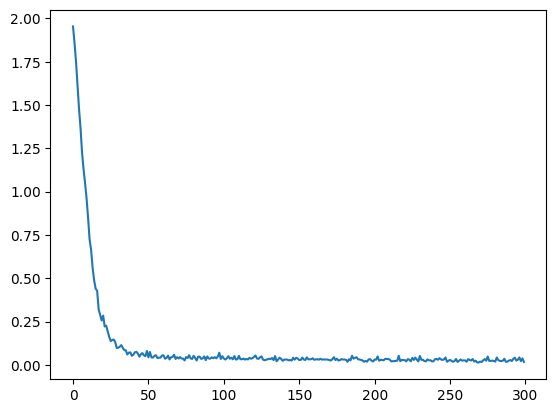

In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
losses=[]
for epoch in range(300):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    losses.append(loss)
    
import matplotlib.pyplot as plt 
plt.plot(range(300),losses)

In [61]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8080


In [66]:
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

In [86]:
class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.Tensor(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        self.lin.reset_parameters()
        self.bias.data.zero_()
        
    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
        # 整个数组都加上了自环
        
        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # Step 3: Compute normalization.
        row, col = edge_index
        # 计算给定一维索引张量的（未加权）度
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

In [90]:
conv = GCNConv(32, 64)
x = conv(x, edge_index)
print(x.size())

torch.Size([32, 64])


In [83]:
import torch
from torch.nn import Sequential as Seq, Linear, ReLU
from torch_geometric.nn import MessagePassing

In [84]:
import torch
from torch.nn import Sequential as Seq, Linear, ReLU
from torch_geometric.nn import MessagePassing

class EdgeConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='max') #  "Max" aggregation.
        self.mlp = Seq(Linear(2 * in_channels, out_channels),
                       ReLU(),
                       Linear(out_channels, out_channels))

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        return self.propagate(edge_index, x=x)

    def message(self, x_i, x_j):
        # x_i has shape [E, in_channels]
        # x_j has shape [E, in_channels]

        tmp = torch.cat([x_i, x_j - x_i], dim=1)  # tmp has shape [E, 2 * in_channels]
        return self.mlp(tmp)

In [ ]:
import torch
from torch_geometric.data import InMemoryDataset, download_url


class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        # Download to `self.raw_dir`.
        download_url(url, self.raw_dir)
        ...

    def process(self):
        # Read data into huge `Data` list.
        data_list = [...]

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

In [ ]:
import os.path as osp

import torch
from torch_geometric.data import Dataset, download_url


class MyOwnDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        return ['data_1.pt', 'data_2.pt', ...]

    def download(self):
        # Download to `self.raw_dir`.
        path = download_url(url, self.raw_dir)
        ...

    def process(self):
        idx = 0
        for raw_path in self.raw_paths:
            # Read data from `raw_path`.
            data = Data(...)

            if self.pre_filter is not None and not self.pre_filter(data):
                continue

            if self.pre_transform is not None:
                data = self.pre_transform(data)

            torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
            idx += 1

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [92]:
from torch_geometric.data import Dataset
class MyOwnDataset(Dataset):
    def __init__(self, transform=None, pre_transform=None):
        super().__init__(None, transform, pre_transform)

In [94]:
from torch_geometric.data import Data

class PairData(Data):
    def __init__(self, edge_index_s=None, x_s=None, edge_index_t=None, x_t=None):
        super().__init__()
        self.edge_index_s = edge_index_s
        self.x_s = x_s
        self.edge_index_t = edge_index_t
        self.x_t = x_t
        
    def __inc__(self, key, value, *args, **kwargs):
        if key == 'edge_index_s':
            return self.x_s.size(0)
        if key == 'edge_index_t':
            return self.x_t.size(0)
        else:
            return super().__inc__(key, value, *args, **kwargs)

In [96]:
from torch_geometric.loader import DataLoader

edge_index_s = torch.tensor([
     [0, 0, 0, 0],
     [1, 2, 3, 4],
 ])
x_s = torch.randn(5, 16)  # 5 nodes.
edge_index_t = torch.tensor([
     [0, 0, 0],
     [1, 2, 3],
 ])
x_t = torch.randn(4, 16)  # 4 nodes.

data = PairData(edge_index_s, x_s, edge_index_t, x_t)
data_list = [data, data]
loader = DataLoader(data_list, batch_size=2)
batch = next(iter(loader))

print(batch)

Batch(edge_index_s=[2, 8], x_s=[10, 16], edge_index_t=[2, 6], x_t=[8, 16])


/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/storage.py:249: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index_t', 'x_t', 'edge_index_s', 'x_s'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  " to suppress this warning")


In [97]:
print(batch.edge_index_s)

tensor([[0, 0, 0, 0, 5, 5, 5, 5],
        [1, 2, 3, 4, 6, 7, 8, 9]])


In [98]:
print(batch.edge_index_t)

tensor([[0, 0, 0, 4, 4, 4],
        [1, 2, 3, 5, 6, 7]])


In [100]:
loader = DataLoader(data_list, batch_size=2, follow_batch=['x_s', 'x_t'])
batch = next(iter(loader))
print(batch)

Batch(edge_index_s=[2, 8], x_s=[10, 16], x_s_batch=[10], edge_index_t=[2, 6], x_t=[8, 16], x_t_batch=[8])


/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/storage.py:249: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index_t', 'x_t', 'edge_index_s', 'x_s'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  " to suppress this warning")


In [102]:
print(batch.x_s_batch,batch.x_t_batch)

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) tensor([0, 0, 0, 0, 1, 1, 1, 1])


In [106]:
from torch_geometric.data import Data

class BipartiteData(Data):
    def __init__(self, edge_index=None, x_s=None, x_t=None):
        super().__init__()
        self.edge_index = edge_index
        self.x_s = x_s
        self.x_t = x_t
        
    def __inc__(self, key, value, *args, **kwargs):
        if key == 'edge_index':
            return torch.tensor([[self.x_s.size(0)], [self.x_t.size(0)]])
        else:
            return super().__inc__(key, value, *args, **kwargs)
    
    def __inc__(self, key, value, *args, **kwargs):
        if key == 'edge_index':
            return torch.tensor([[self.x_s.size(0)], [self.x_t.size(0)]])
        else:
            return super().__inc__(key, value, *args, **kwargs)

In [108]:
 from torch_geometric.loader import DataLoader

 edge_index = torch.tensor([
     [0, 0, 1, 1],
     [0, 1, 1, 2],
 ])
 x_s = torch.randn(2, 16)  # 2 nodes.
 x_t = torch.randn(3, 16)  # 3 nodes.

 data = BipartiteData(edge_index, x_s, x_t)
 data_list = [data, data]
 loader = DataLoader(data_list, batch_size=2)
 batch = next(iter(loader))

 print(batch)
 print(batch.edge_index)

Batch(edge_index=[2, 8], x_s=[4, 16], x_t=[6, 16], batch=[6], ptr=[3])
tensor([[0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 1, 2, 3, 4, 4, 5]])


/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/storage.py:249: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_t', 'edge_index', 'x_s'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  " to suppress this warning")


In [109]:
 from torch_geometric.data import Data
 from torch_geometric.loader import DataLoader

 class MyData(Data):
     def __cat_dim__(self, key, value, *args, **kwargs):
         if key == 'foo':
             return None
         else:
             return super().__cat_dim__(key, value, *args, **kwargs)

edge_index = torch.tensor([
   [0, 1, 1, 2],
   [1, 0, 2, 1],
])
foo = torch.randn(16)

data = MyData(edge_index=edge_index, foo=foo)
data_list = [data, data]
loader = DataLoader(data_list, batch_size=2)
batch = next(iter(loader))

print(batch)

Batch(edge_index=[2, 8], foo=[2, 16], batch=[6], ptr=[3])


/home/suzhang/anaconda3/envs/plnlp/lib/python3.7/site-packages/torch_geometric/data/storage.py:249: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'foo'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  " to suppress this warning")


In [ ]:
from torch_geometric.nn import MessagePassing

x = ...           # Node features of shape [num_nodes, num_features]
edge_index = ...  # Edge indices of shape [2, num_edges]

class MyConv(MessagePassing):
    def __init__(self):
        super().__init__(aggr="add")

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

    def message(self, x_i, x_j):
        return MLP(x_j - x_i)

In [ ]:
from torch_scatter import scatter

x = ...           # Node features of shape [num_nodes, num_features]
edge_index = ...  # Edge indices of shape [2, num_edges]

x_j = x[edge_index[0]]  # Source node features [num_edges, num_features]
x_i = x[edge_index[1]]  # Target node features [num_edges, num_features]

msg = MLP(x_j - x_i)  # Compute message for each edge

# Aggregate messages based on target node indices
out = scatter(msg, edge_index[1], dim=0, dim_size=x.size(0), reduce="add")

In [ ]:
from torch_sparse import SparseTensor

num_nodes=100

adj = SparseTensor(row=edge_index[0], col=edge_index[1], value=...,
                   sparse_sizes=(num_nodes, num_nodes))
# value is optional and can be None

# Obtain different representations (COO, CSR, CSC):
row,    col, value = adj.coo()
rowptr, col, value = adj.csr()
colptr, row, value = adj.csc()

adj = adj[:100, :100]  # Slicing, indexing and masking support
adj = adj.set_diag()   # Add diagonal entries
adj_t = adj.t()        # Transpose
out = adj.matmul(x)    # Sparse-dense matrix multiplication
adj = adj.matmul(adj)  # Sparse-sparse matrix multiplication

# Creating SparseTensor instances:
adj = SparseTensor.from_dense(mat)
adj = SparseTensor.eye(100, 100)
adj = SparseTensor.from_scipy(mat)

In [ ]:
from torch_sparse import matmul

class GINConv(MessagePassing):
    def __init__(self):
        super().__init__(aggr="add")

    def forward(self, x, edge_index):
        out = self.propagate(edge_index, x=x)
        return MLP((1 + eps) x + out)

    def message(self, x_j):
        return x_j

    def message_and_aggregate(self, adj_t, x):
        return matmul(adj_t, x, reduce=self.aggr)

In [124]:
import torch
import torch.nn.functional as F

from torch_geometric.nn import GCNConv
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/home/suzhang/data/',name='Cora' ,transform=T.ToSparseTensor())
data = dataset[0]

Processing...
Done!


In [126]:
data = dataset[0]
data

Data(x=[2708, 1433], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], adj_t=[2708, 2708, nnz=10556])

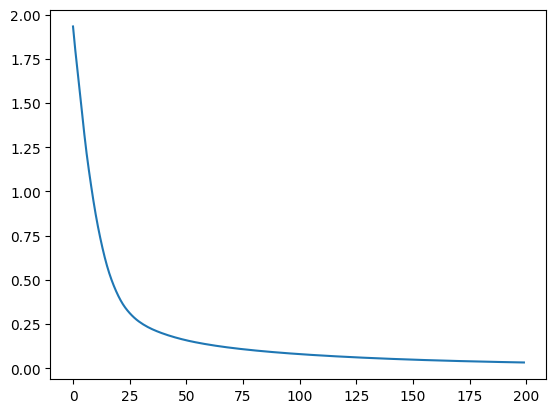

In [127]:
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, 16, cached=True)
        self.conv2 = GCNConv(16, dataset.num_classes, cached=True)

    def forward(self, x, adj_t):
        x = self.conv1(x, adj_t)
        x = F.relu(x)
        x = self.conv2(x, adj_t)
        return F.log_softmax(x, dim=1)

model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return float(loss)

losses=[]
for epoch in range(1, 201):
    loss = train(data)
    losses.append(loss)
    
plt.plot(range(len(losses)),losses)

In [129]:
from torch import nn
n, d, m = 3, 5, 7
embedding = nn.Embedding(n, d, max_norm=True)
W = torch.randn((m, d), requires_grad=True)
idx = torch.tensor([1, 2])
a = embedding.weight.clone() @ W.t()  # weight must be cloned for this to be differentiable
b = embedding(idx) @ W.t()  # modifies weight in-place
out = (a.unsqueeze(0) + b.unsqueeze(1))
loss = out.sigmoid().prod()
loss.backward()

In [138]:
embedding(torch.tensor([[1,2,0]]))

tensor([[[ 0.7716,  0.0844, -0.4208,  0.2753,  0.3803],
         [ 0.9087, -0.2162, -0.2751, -0.1832, -0.1350],
         [-0.3540, -0.2794, -0.5218, -0.0132,  0.7240]]],
       grad_fn=<EmbeddingBackward>)

In [151]:
# Standard usage
from torch_geometric.utils import negative_sampling
edge_index = torch.tensor([[0, 0, 1, 2],
                            [0, 1, 2, 3]])
negative_sampling(edge_index)

tensor([[2, 0, 2, 3],
        [2, 3, 0, 1]])

In [156]:
negative_sampling(edge_index, num_nodes=5)
# 二部图

tensor([[0, 3, 0, 3],
        [4, 4, 2, 0]])